<a href="https://colab.research.google.com/github/kimdanni/ANOPOS/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 1.761s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [3]:
# list them
!ls -l

total 3524
-rw-r--r-- 1 root root   59898 Jan  6 02:08 chinese.jpg
-rw-r--r-- 1 root root   97910 Jan  6 02:08 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Jan  6 02:08 english.png
-rw-r--r-- 1 root root  487995 Jan  6 02:08 example2.png
-rw-r--r-- 1 root root  127454 Jan  6 02:08 example3.png
-rw-r--r-- 1 root root  488641 Jan  6 02:08 example.png
-rw-r--r-- 1 root root  168376 Jan  6 02:08 french.jpg
-rw-r--r-- 1 root root   42159 Jan  6 02:08 japanese.jpg
-rw-r--r-- 1 root root  225531 Jan  6 02:08 korean.png
-rw-r--r-- 1 root root   12683 Feb 16 13:58 reciept.jpg
drwxr-xr-x 1 root root    4096 Feb 14 14:37 sample_data
-rw-r--r-- 1 root root   82229 Jan  6 02:08 thai.jpg
-rw-r--r-- 1 root root   34706 Jan  6 02:08 width_ths.png


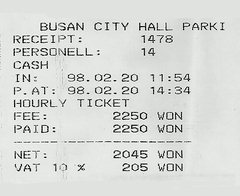

In [30]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/reciept.jpg")
im

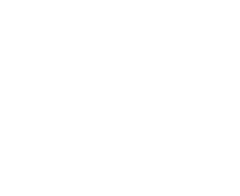

In [39]:
from PIL import Image

def create_white_background(image):
    width, height = image.size
    white_image = Image.new('RGB', (width, height), (255, 255, 255))
    return white_image

white_im = create_white_background(im)
white_im

In [26]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

In [45]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext("/content/reciept.jpg")
# (bounding box의 좌표, 인식한 텍스트, 신뢰도)
bounds 

[([[39, 21], [87, 21], [87, 35], [39, 35]], 'BUSAN', 0.994482165944131),
 ([[93, 19], [131, 19], [131, 35], [93, 35]], 'CITY', 0.9198060631752014),
 ([[137, 21], [173, 21], [173, 35], [137, 35]], 'HALI', 0.9558029770851135),
 ([[181, 21], [227, 21], [227, 33], [181, 33]], 'PARKI', 0.6497282669260595),
 ([[11, 33], [77, 33], [77, 47], [11, 47]], 'RrECEIPT', 0.6365514718050842),
 ([[139, 33], [177, 33], [177, 47], [139, 47]], '1478', 0.9999575614929199),
 ([[11, 45], [103, 45], [103, 59], [11, 59]],
  'PERSONELL:',
  0.7336449860729966),
 ([[11, 59], [51, 59], [51, 73], [11, 73]], 'CASH', 0.20342688262462616),
 ([[15, 73], [41, 73], [41, 85], [15, 85]], '[N:', 0.7203072309494019),
 ([[93, 71], [115, 71], [115, 85], [93, 85]], '02_', 0.45892863145514484),
 ([[149, 73], [193, 73], [193, 85], [149, 85]], '11:54', 0.878394804929037),
 ([[29, 85], [53, 85], [53, 99], [29, 99]], 'AT =', 0.3392786305906527),
 ([[93, 85], [115, 85], [115, 97], [93, 97]], '02-', 0.6832042881814681),
 ([[119, 85],

In [53]:
import matplotlib.pyplot as plt

def plot_decimal_histogram(data, num_bins=20):
    plt.hist(data, bins=num_bins)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Decimal Data Histogram')
    plt.show()

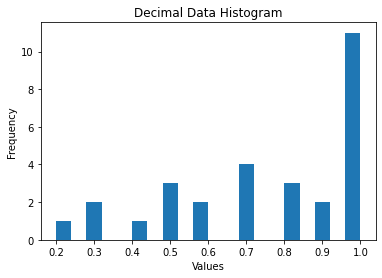

In [55]:
rate = [bound[2] for bound in bounds]
rounded_rate = [round(bound[2], 1) for bound in bounds]
plot_decimal_histogram(rounded_rate)

In [56]:
import numpy as np

# IQR 방법
q1, q3 = np.percentile(rate, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("이상치 범위: ({}, {})".format(lower_bound, upper_bound))

이상치 범위: (0.09965543059651405, 1.5313782071527011)


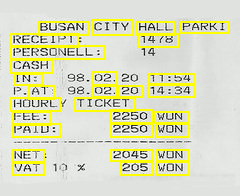

In [32]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [18]:
print(bounds[0][1])

BUSAN


BUSAN
CITY
HALI
PARKI
RrECEIPT
1478
PERSONELL:
CASH
[N:
02_
11:54
AT =
02-
20
14:34
HOURL
TICKET
FEE:
2250
VON
PAID:
2250
YON
NET
2045
VON
Vat
205
wON


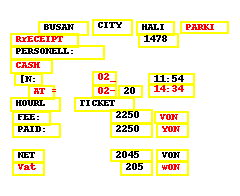

In [41]:
from PIL import Image, ImageDraw, ImageFont

def draw_boxes_with_labels(image, bounds, color='yellow', width=2, font_size=35):
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    for i, bound in enumerate(bounds):
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        label = bound[1]
        
        label_width, label_height = font.getsize(label)
        print(label)
        if(bound[2] < 0.7):
          draw.text([p0[0] + 5, p0[1]], label, fill='red', font=font)
        else:
          draw.text([p0[0] + 5, p0[1]], label, fill='black', font=font)
    return image

draw_boxes_with_labels(white_im, bounds)